In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.mnist.load_data()

In [ ]:
xtrain[0].shape

(28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtest.shape,ytest.shape

((10000, 28, 28), (10000,))

In [ ]:
#normalization:
xtrain = xtrain/255

In [ ]:
ytrain_v2 = tf.keras.utils.to_categorical(ytrain)

In [ ]:
ytrain_v2.shape

(60000, 10)

In [ ]:
#del model

In [ ]:
def FCNN(x,y,hl1_neuron = 128,hl2_neuron=None,learning_rate=0.01,batch_size = 64,epochs = 20,plot = None):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Input(x[0].shape,name = 'Input'))
  model.add(tf.keras.layers.Flatten(name = 'Flatten'))
  model.add(tf.keras.layers.Dense(hl1_neuron,activation = tf.keras.activations.relu, name = 'hidden1'))

  if hl2_neuron:
    model.add(tf.keras.layers.Dense(hl2_neuron,activation = tf.keras.activations.relu,name = 'hidden2'))
  else:
    pass

  model.add(tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax, name = 'Output'))

  model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate),loss = tf.keras.losses.categorical_crossentropy,metrics = 'acc')
  model.fit(x = x,y = y,batch_size = batch_size,epochs = epochs, validation_split = 0.1)

  score = pd.DataFrame()
  score['val_loss'] = model.history.history['val_loss']
  score['loss']     = model.history.history['loss']
  score['val_acc']  = model.history.history['val_acc']
  score['acc']      = model.history.history['acc']

  if plot:
    plt.title('Epoch vs Losses')
    plt.plot(score['loss'],label = 'Loss')
    plt.plot(score['val_loss'],label = 'Validation Losses')
    plt.legend(loc = 'best')
    plt.show()
  else:
    pass

  return (model,score)

In [ ]:
(model,score) = FCNN(x=xtrain,y=ytrain_v2,hl2_neuron=32,learning_rate=0.01,batch_size = 128,epochs = 20)

Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 1.3746 - acc: 0.6303 - val_loss: 0.6319 - val_acc: 0.8668
Epoch 2/20
422/422 [==============================] - 2s 6ms/step - loss: 0.5536 - acc: 0.8594 - val_loss: 0.3767 - val_acc: 0.9055
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.4151 - acc: 0.8873 - val_loss: 0.3073 - val_acc: 0.9208
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3618 - acc: 0.8989 - val_loss: 0.2774 - val_acc: 0.9252
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3320 - acc: 0.9057 - val_loss: 0.2545 - val_acc: 0.9323
Epoch 6/20
422/422 [==============================] - 1s 4ms/step - loss: 0.3103 - acc: 0.9109 - val_loss: 0.2405 - val_acc: 0.9348
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2934 - acc: 0.9158 - val_loss: 0.2302 - val_acc: 0.9360
Epoch 8/20
422/422 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
score

,val_loss,loss,val_acc,acc
0,0.631877,1.374552,0.866833,0.630259
1,0.376726,0.553582,0.905500,0.859370
2,0.307331,0.415065,0.920833,0.887278
3,0.277436,0.361831,0.925167,0.898870
4,0.254524,0.331956,0.932333,0.905685
5,0.240516,0.310298,0.934833,0.910870
6,0.230237,0.293450,0.936000,0.915815
7,0.219987,0.279175,0.939000,0.919815
8,0.211183,0.266380,0.942000,0.923204
9,0.203584,0.255492,0.942833,0.926426


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 hidden2 (Dense)             (None, 32)                4128      
                                                                 
 Output (Dense)              (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


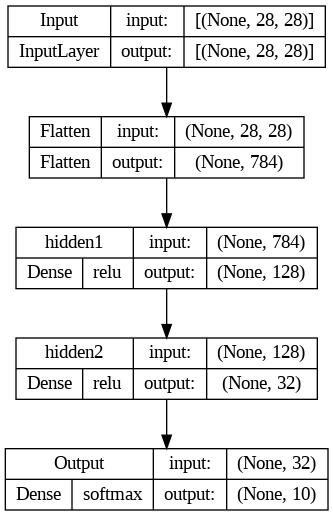

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True)

Tag = 6


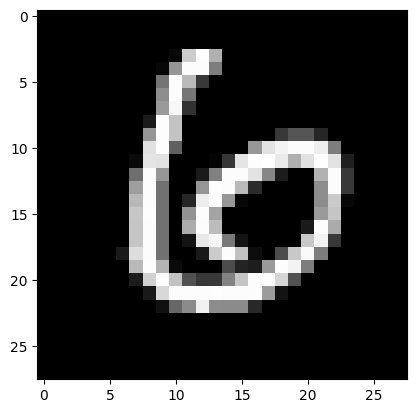

In [ ]:
test_image = xtest[11]
plt.imshow(test_image,cmap = 'gray')
print(f'Tag = {ytest[11]}')

In [ ]:
test_image = np.expand_dims(test_image,axis = 0)

In [ ]:
test_image.shape

(1, 28, 28)

In [ ]:
model.predict(test_image)

1/1 [==============================] - 0s 59ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(test_image))

1/1 [==============================] - 0s 29ms/step


6

In [ ]:
del model

In [ ]:
score = {}
for i in [16,32,64,128,512,1024]:
  score[i]  = FCNN(x = xtrain, y = ytrain_v2, hl1_neuron = 128, hl2_neuron = 32, batch_size = i, epochs = 10)

Epoch 1/10
3375/3375 [==============================] - 15s 4ms/step - loss: 0.5124 - acc: 0.8587 - val_loss: 0.2315 - val_acc: 0.9322
Epoch 2/10
3375/3375 [==============================] - 8s 3ms/step - loss: 0.2491 - acc: 0.9284 - val_loss: 0.1736 - val_acc: 0.9508
Epoch 3/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.1948 - acc: 0.9443 - val_loss: 0.1407 - val_acc: 0.9622
Epoch 4/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.1607 - acc: 0.9532 - val_loss: 0.1247 - val_acc: 0.9643
Epoch 5/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.1348 - acc: 0.9611 - val_loss: 0.1145 - val_acc: 0.9692
Epoch 6/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.1152 - acc: 0.9667 - val_loss: 0.0985 - val_acc: 0.9715
Epoch 7/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.0997 - acc: 0.9712 - val_loss: 0.1082 - val_acc: 0.9677
Epoch 8/10
3375/3375 [==============================] - 8s 2m

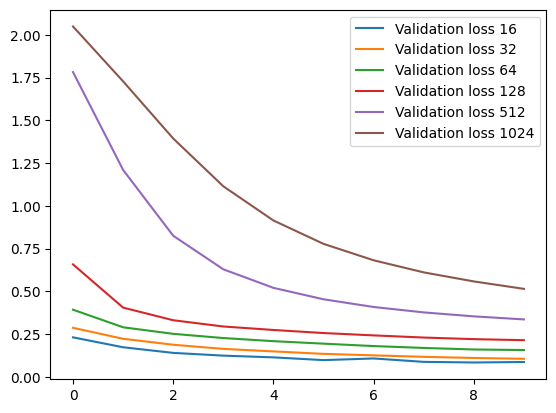

In [ ]:
for bs in [16,32,64,128,512,1024]:
  plt.plot(score[bs][1].val_loss, label = 'Validation loss' +' '+str(bs))
  plt.legend()